In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/Exercise.csv', skiprows = 6, skipfooter= 1)
columns_to_keep = ['US','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df = df[columns_to_keep]
df

C:\Users\HP\AppData\Local\Temp\ipykernel_5212\1846131547.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('C:/Users/HP/Downloads/Exercise.csv', skiprows = 6, skipfooter= 1)


,US,1,2,3,4,5,6,7,8,9,10,11,12
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


In [3]:
df.dtypes

US    float64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
dtype: object

In [4]:
df['Means'] = df.iloc[:, 1:].mean(axis=1)

In [5]:
df['STD'] = df.iloc[:, 1:].std(axis = 1)

In [6]:
df['Standard Error'] = df.apply(lambda x : round(x['STD']/np.sqrt(len(df)), 2), axis = 1)

In [7]:
from scipy.stats import t

confidence = 0.95
degree_of_freedom = 11
df['t-Statistics'] = t.ppf(1 - (1 - confidence) / 2, df=degree_of_freedom)
df

,US,1,2,3,4,5,6,7,8,9,10,11,12,Means,STD,Standard Error,t-Statistics
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,2.916667,1.705791,0.41,2.200985
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,1.666667,1.840894,0.45,2.200985
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,1.666667,2.013841,0.49,2.200985
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,3.166667,2.303379,0.56,2.200985
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,6.083333,2.928547,0.71,2.200985
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,10.750000,3.722119,0.90,2.200985
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,18.833333,6.529846,1.58,2.200985
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,30.333333,8.117197,1.97,2.200985
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,22.750000,5.198157,1.26,2.200985
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,17.583333,4.536120,1.10,2.200985


In [8]:
df['Lower Bound'] = df.apply(lambda x: x['Means'] - (x['Standard Error'] * x['t-Statistics']), axis = 1)
df['Upper Bound'] = df.apply(lambda x: x['Means'] + (x['Standard Error'] * x['t-Statistics']), axis = 1)

In [9]:
df['No. of Pairs'] = df.apply(lambda x : round(x['Upper Bound']), axis = 1)

In [10]:
df

,US,1,2,3,4,5,6,7,8,9,10,11,12,Means,STD,Standard Error,t-Statistics,Lower Bound,Upper Bound,No. of Pairs
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,2.916667,1.705791,0.41,2.200985,2.014263,3.819071,4
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,1.666667,1.840894,0.45,2.200985,0.676223,2.657110,3
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,1.666667,2.013841,0.49,2.200985,0.588184,2.745149,3
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,3.166667,2.303379,0.56,2.200985,1.934115,4.399218,4
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,6.083333,2.928547,0.71,2.200985,4.520634,7.646033,8
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,10.750000,3.722119,0.90,2.200985,8.769113,12.730887,13
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,18.833333,6.529846,1.58,2.200985,15.355777,22.310890,22
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,30.333333,8.117197,1.97,2.200985,25.997393,34.669274,35
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,22.750000,5.198157,1.26,2.200985,19.976759,25.523241,26
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,17.583333,4.536120,1.10,2.200985,15.162250,20.004417,20


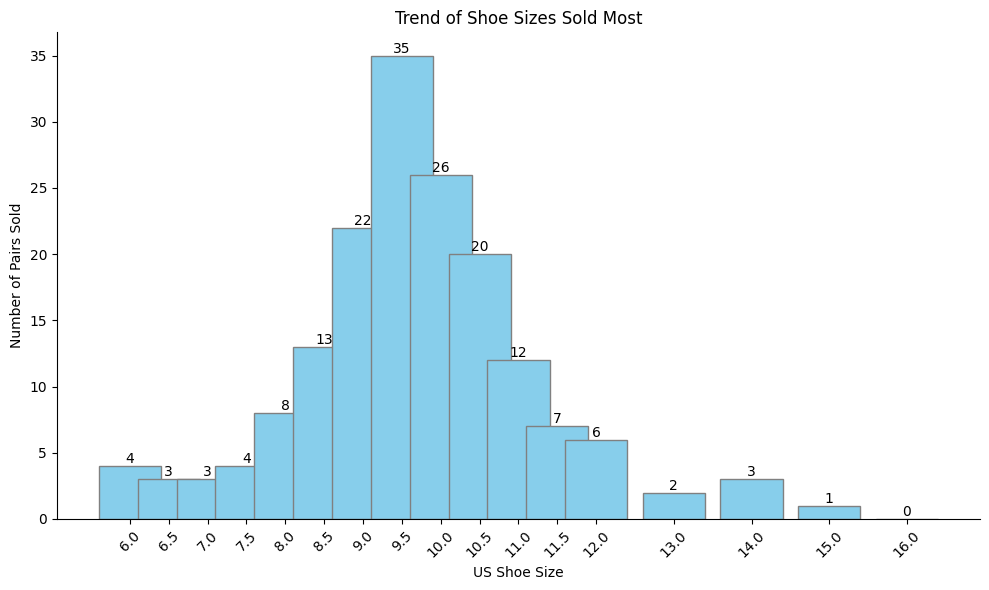

In [11]:
plt.figure(figsize=(10, 6))

# Create the bar plot
bars = plt.bar(df['US'], height=df['No. of Pairs'], color='skyblue',edgecolor='grey')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('US Shoe Size')
plt.ylabel('Number of Pairs Sold')
plt.title('Trend of Shoe Sizes Sold Most')
plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability
plt.xticks(df['US'])
#plt.grid(True, axis='y')  # Add horizontal grid lines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


In [48]:
# The shoe sizes sales for f store

df2 = pd.read_csv('C:/Users/HP/Downloads/Exercise2.csv', skiprows = 11,skipfooter = 1, engine = 'python')
columns_1_to_12 = [str(i) for i in range(1, 13)]
df_first = df2[['US'] + columns_1_to_12]
df_first

,US,1,2,3,4,5,6,7,8,9,10,11,12
0,4.0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.5,0,0,0,0,1,3,0,0,0,0,1,0
2,5.0,0,0,0,0,0,0,2,0,0,0,0,0
3,5.5,0,0,0,0,0,0,0,0,0,0,1,0
4,6.0,0,2,0,0,0,0,0,0,0,0,0,0
5,6.5,3,3,1,2,1,0,2,0,2,1,3,4
6,7.0,0,3,3,4,1,0,1,0,2,0,0,1
7,7.5,1,2,4,1,2,6,4,3,5,8,2,1
8,8.0,6,10,3,9,1,3,6,8,3,12,3,9
9,8.5,10,10,10,7,14,4,7,7,4,8,7,9


In [49]:
# The shoe sizes sales for second store

columns_to_select = ['US', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1', '9.1', '10.1', '11.1', '12.1']

# Use the filter function to select columns
df_second = df2[columns_to_select]
df_second

,US,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1
0,4.0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.5,0,0,0,0,0,0,0,0,0,1,0,0
2,5.0,0,0,0,0,0,0,0,2,0,0,0,0
3,5.5,0,0,0,0,0,0,0,1,0,2,0,1
4,6.0,0,1,3,1,2,0,0,0,0,0,0,0
5,6.5,2,0,2,1,1,2,0,1,2,1,3,0
6,7.0,0,0,0,4,1,3,1,1,1,3,1,4
7,7.5,2,1,1,3,2,7,9,8,14,8,6,3
8,8.0,13,6,5,13,5,3,11,6,6,9,8,3
9,8.5,8,5,10,4,5,5,9,7,3,7,9,8


In [75]:
df_combined['Mean1'] = df_first.iloc[:,1:].mean(axis = 1 )
df_combined['Mean2'] = df_second.iloc[:,1:].mean(axis = 1)

In [51]:
df_first

,US,1,2,3,4,5,6,7,8,9,10,11,12,Mean1
0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,4.5,0,0,0,0,1,3,0,0,0,0,1,0,0.416667
2,5.0,0,0,0,0,0,0,2,0,0,0,0,0,0.166667
3,5.5,0,0,0,0,0,0,0,0,0,0,1,0,0.083333
4,6.0,0,2,0,0,0,0,0,0,0,0,0,0,0.166667
5,6.5,3,3,1,2,1,0,2,0,2,1,3,4,1.833333
6,7.0,0,3,3,4,1,0,1,0,2,0,0,1,1.250000
7,7.5,1,2,4,1,2,6,4,3,5,8,2,1,3.250000
8,8.0,6,10,3,9,1,3,6,8,3,12,3,9,6.083333
9,8.5,10,10,10,7,14,4,7,7,4,8,7,9,8.083333


In [52]:
df_second

,US,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,Mean2
0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,4.5,0,0,0,0,0,0,0,0,0,1,0,0,0.083333
2,5.0,0,0,0,0,0,0,0,2,0,0,0,0,0.166667
3,5.5,0,0,0,0,0,0,0,1,0,2,0,1,0.333333
4,6.0,0,1,3,1,2,0,0,0,0,0,0,0,0.583333
5,6.5,2,0,2,1,1,2,0,1,2,1,3,0,1.250000
6,7.0,0,0,0,4,1,3,1,1,1,3,1,4,1.583333
7,7.5,2,1,1,3,2,7,9,8,14,8,6,3,5.333333
8,8.0,13,6,5,13,5,3,11,6,6,9,8,3,7.333333
9,8.5,8,5,10,4,5,5,9,7,3,7,9,8,6.666667


In [61]:
df_combined = pd.DataFrame()
df_combined['Vr1'] = df_first.iloc[:, 1:-2].var(axis=1, ddof=1)
df_combined['Vr2'] = df_second.iloc[:,1:-2].var(axis=1, ddof=1)

In [70]:
df_combined
print(df_combined.columns)
df_combined['Pooled_V'] = ((df_combined['Vr1'] * 11) + (df_combined['Vr2'] * 11)) / 22

Index(['Vr1', 'Vr2'], dtype='object')


In [74]:
df_combined['Standard_Error'] = np.sqrt((df_combined['Pooled_V']/11)+(df_combined['Pooled_V']/11))
# Calculate critical value from t-distribution
t_critical = t.ppf(1 - 0.10 / 2, 22)
#df_combined['Lower Bound'] = 

1.717144374380242

In [80]:
df_combined['Margin of Error'] =  t_critical * df_combined['Standard_Error']
df_combined['Lower Bound'] = (df_combined['Mean1'] - df_combined['Mean2']) - df_combined['Margin of Error']
df_combined['Upper Bound'] = (df_combined['Mean1'] - df_combined['Mean2']) + df_combined['Margin of Error']
df_combined

,Vr1,Vr2,Pooled_V,Standard_Error,Mean1,Mean2,Margin of Error,Lower Bound,Upper Bound
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.810606,0.090909,0.450758,0.286279,0.444805,0.083333,0.491583,-0.130111,0.853055
2,0.333333,0.363636,0.348485,0.251716,0.178571,0.166667,0.432232,-0.420328,0.444137
3,0.083333,0.418182,0.250758,0.213524,0.083333,0.333333,0.366651,-0.616651,0.116651
4,0.333333,1.054545,0.693939,0.355205,0.178571,0.583333,0.609939,-1.014701,0.205177
5,1.606061,0.854545,1.230303,0.472960,1.817100,1.250000,0.812141,-0.245042,1.379241
6,2.022727,1.854545,1.938636,0.593700,1.305195,1.583333,1.019468,-1.297607,0.741330
7,4.931818,17.072727,11.002273,1.414360,3.370130,5.333333,2.428660,-4.391863,0.465456
8,12.265152,11.418182,11.841667,1.467321,6.524892,7.333333,2.519602,-3.328043,1.711160
9,7.719697,5.272727,6.496212,1.086798,8.057359,6.666667,1.866189,-0.475496,3.256881


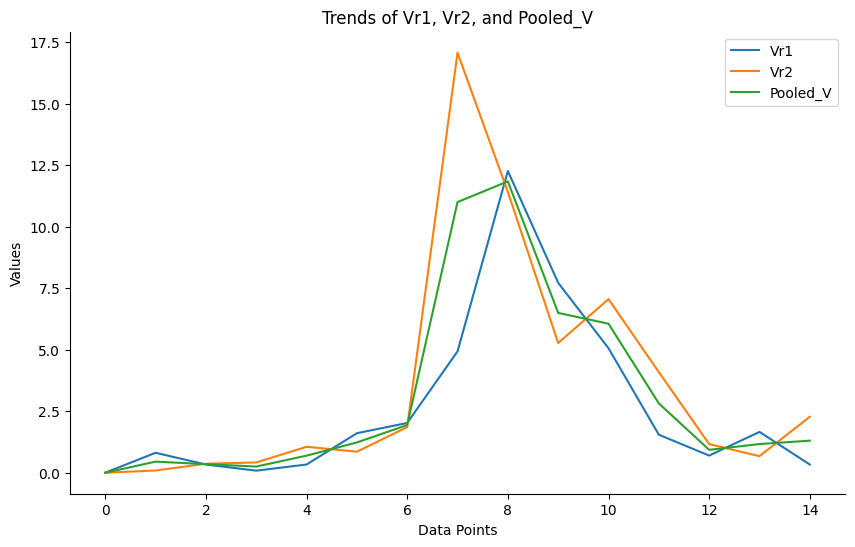

In [84]:
import matplotlib.pyplot as plt

# Sample data
# df_combined is your DataFrame containing the data

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df_combined['Vr1'], label='Vr1')
plt.plot(df_combined['Vr2'], label='Vr2')
plt.plot(df_combined['Pooled_V'], label='Pooled_V')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Trends of Vr1, Vr2, and Pooled_V')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

# Comparative Analysis: By comparing the trends of Vr1 and Vr2 with Pooled_V, you can see how well the
# pooled variance captures the overall behavior of the individual variables.

<Figure size 1000x600 with 0 Axes>

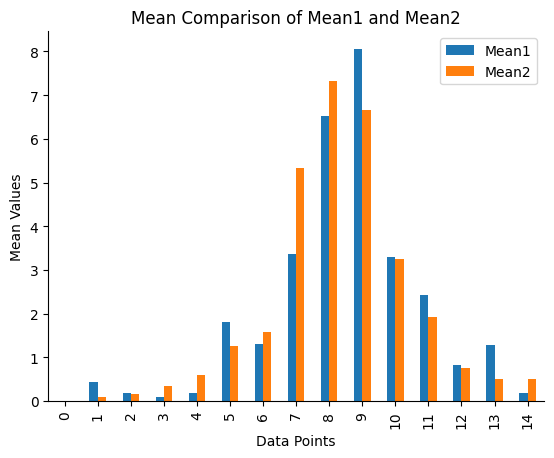

In [86]:
# Bar Plot for Mean Comparison
plt.figure(figsize=(10, 6))
df_combined[['Mean1', 'Mean2']].plot(kind='bar')
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean Comparison of Mean1 and Mean2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [89]:
plt.errorbar?

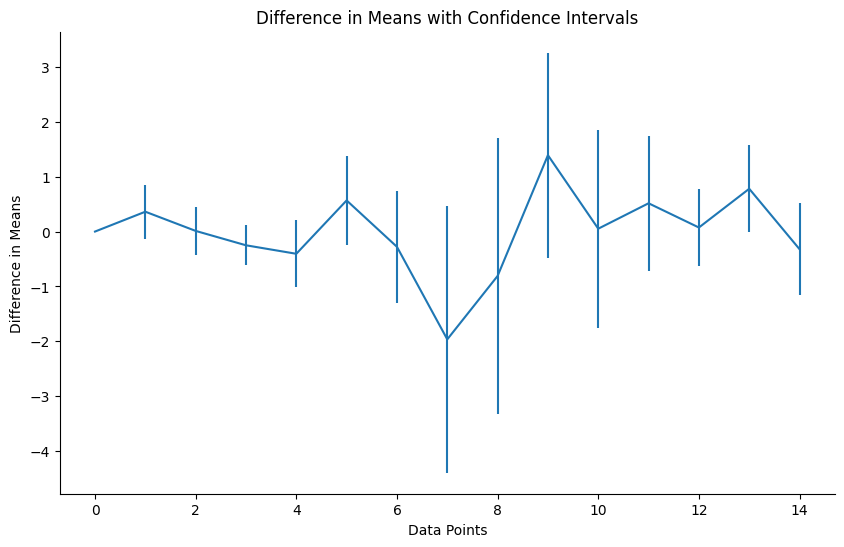

In [88]:

# Error Bar Plot for Confidence Intervals
plt.figure(figsize=(10, 6))
plt.errorbar(df_combined.index, df_combined['Mean1'] - df_combined['Mean2'], yerr=df_combined['Margin of Error'])
plt.xlabel('Data Points')
plt.ylabel('Difference in Means')
plt.title('Difference in Means with Confidence Intervals')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#In summary, the error bar plot visually communicates the variability and uncertainty in the difference in
#means between Mean1 and Mean2.

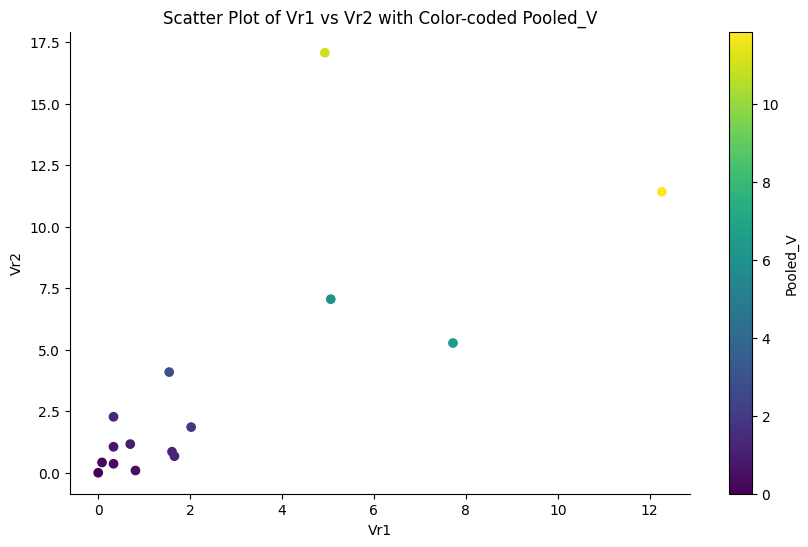

In [90]:
# Scatter Plot for Comparison
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['Vr1'], df_combined['Vr2'], c=df_combined['Pooled_V'], cmap='viridis')
plt.xlabel('Vr1')
plt.ylabel('Vr2')
plt.title('Scatter Plot of Vr1 vs Vr2 with Color-coded Pooled_V')
plt.colorbar(label='Pooled_V')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()